# Temperature - Body Event - Body Health

## Library

In [16]:
import json
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import folium
from shapely.geometry import LineString
import geopandas as gpd
from folium.plugins import PolyLineTextPath
import branca.colormap as cm
from datetime import datetime, timedelta

In [17]:
# Importamos el Activity_Event_
with open('data_sources/simulation/body_health/events/temperature.json') as file:
    data = json.load(file)

## Event

Event date: June 13, 2024 at 10:00
Temperature Average: 32.0 °C.
Temperature Maximum: 33.0 °C.
Temperature Minimum: 31.0 °C.


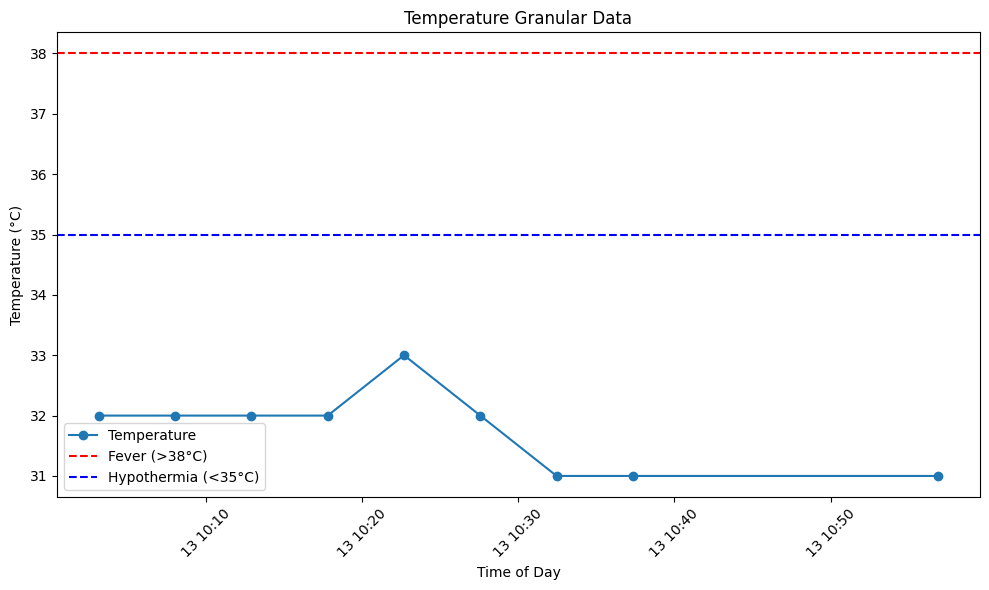

In [19]:
temperature_avg = data['body_health']['events']['temperature_event']['temperature'].get('temperature_avg_object', {}).get('temperature_celsius_float', None)
temperature_max = data['body_health']['events']['temperature_event']['temperature'].get('temperature_maximum_object', {}).get('temperature_celsius_float', None)
temperature_min = data['body_health']['events']['temperature_event']['temperature'].get('temperature_minimum_object', {}).get('temperature_celsius_float', None)
temperature_granular = data['body_health']['events']['temperature_event']['temperature'].get('temperature_granular_data_array', None)
original_date = data['body_health']['events']['temperature_event']['metadata']['datetime_string']

def translate_date(date_str):
    months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
    dt = datetime.fromisoformat(date_str.replace("Z", "+00:00"))
    return f"{months[dt.month - 1]} {dt.day}, {dt.year} at {dt.hour:02d}:{dt.minute:02d}"
translated_date = translate_date(original_date)

# Handle Temperature Average
if temperature_avg is None:
    if temperature_granular:
        granular_df = pd.DataFrame(temperature_granular)
        temperature_avg = granular_df['temperature_celsius_float'].mean()
    else:
        temperature_avg = "No values ​​were obtained or it is null."

# Handle Temperature Maximum
if temperature_max is None:
    if temperature_granular:
        granular_df = pd.DataFrame(temperature_granular)
        temperature_max = granular_df['temperature_celsius_float'].max()
    else:
        temperature_max = "No values ​​were obtained or it is null."

# Handle Temperature Minimum
if temperature_min is None:
    if temperature_granular:
        granular_df = pd.DataFrame(temperature_granular)
        temperature_min = granular_df['temperature_celsius_float'].min()
    else:
        temperature_min = "No values ​​were obtained or it is null."

# Display the results
temperature_avg_result = f'Temperature Average: {temperature_avg} °C.' if isinstance(temperature_avg, float) else temperature_avg
temperature_max_result = f'Temperature Maximum: {temperature_max} °C.' if isinstance(temperature_max, float) else temperature_max
temperature_min_result = f'Temperature Minimum: {temperature_min} °C.' if isinstance(temperature_min, float) else temperature_min

print(f"Event date: {translated_date}")
print(temperature_avg_result)
print(temperature_max_result)
print(temperature_min_result)

if temperature_granular and 'datetime_string' in temperature_granular[0]:
    df = pd.DataFrame(temperature_granular)
    df['datetime'] = pd.to_datetime(df['datetime_string'])

    plt.figure(figsize=(10, 6))
    plt.plot(df['datetime'], df['temperature_celsius_float'], marker='o', linestyle='-', label='Temperature')
    plt.axhline(y=38, color='r', linestyle='--', label='Fever (>38°C)')
    plt.axhline(y=35, color='b', linestyle='--', label='Hypothermia (<35°C)')
    plt.title('Temperature Granular Data')
    plt.xlabel('Time of Day')
    plt.ylabel('Temperature (°C)')
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

else:
    # Mostrar un mensaje en lugar del gráfico si no hay información granular o falta el campo
    print("No granular data or 'datetime_string' not found in data.")
    plt.figure(figsize=(10, 6))
    plt.text(0.5, 0.5, 'Temperature Chart: No granular information available', 
             horizontalalignment='center', verticalalignment='center', fontsize=12)
    plt.axis('off')
    plt.show()